In [81]:
# Plot up Malcom exported GCMS data for HIPPIE-DIPPIE paper
# CSV files were exported by:
# Malcom > Project Explorer (Filter by "Ion *") 
#        > Drag to Export Window  
# 
# dtwang (ExxonMobil), 22 May 2020 (originally copied from Plot_Up_TEGCMS as of 22 May 2020)

In [16]:
import glob, os, sys, re

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
import uncertainties as u
import uncertainties.umath as um
import scipy.io

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = ['Arial', 'sans-serif']

plt.close('all')

In [4]:
technique = 'GCMS'
project = 'HIPPIE-DIPPIE'

## Processing
Only need to run the below code once.

In [11]:
## SETUP PROCESSING

# Load in data from HIPPIE-DIPPIE, full scan m/z 10-50

ionlist = ['TIC'] + list(range(10,50+1,1))

startdir = r'H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data'
#startdir = os.getcwd()
os.chdir(startdir)
print('Current directory is: ' + os.getcwd())

iondir = ".\\Malcom_export_try4\\"

try:
    naming = pd.read_csv('Naming.tsv', names=['URC#', 'Label'], dtype={'URC#':str, 'Label':str}, 
                         sep='\t', encoding='ansi')
except FileNotFoundError:
    naming = pd.DataFrame({'URC#':[np.NaN, np.NaN], 'Label':['empty1', 'empty2']})

plotzerosig = True # Set to True if want to plot a placeholder box for ions with zero signal (must have exported TIC)

Current directory is: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data


In [12]:
signalmat = []

for ion in ionlist:
    
    print('Working on Signal ' + str(ion) + ' ...')
    
    os.chdir(iondir)
    print('Directory changed to: ' + os.getcwd())

    if plotzerosig==True:
        ionstr = ''
        filelist = glob.glob(r'.\*' + ionstr + '.csv')   # list all files matching ".csv"
        filelist = [ x for x in filelist if 'Ion ' not in x ]          # List comprehension to capture "Ion "-containing filenames and drop them 
        matchstr = r'(?:.\\)([^/\r\n]+)(?:.csv)'                       # match and strip the suffix in filename
    elif plotzerosig==False:
        if type(ion)==int:
            ionstr = 'Ion ' + str(ion)
            filelist = glob.glob(r'.\*' + ionstr + '.csv')       # list all files matching "*Ion *.csv"
            matchstr = r'(?:.\\)([^/\r\n]+)(?:.' + ionstr + '.csv)'            # match and strip all (*)Ion 191(*) in filename
        elif type(ion)==str:
            if ion == 'TIC':
                ionstr = ''
                filelist = glob.glob(r'.\*' + ionstr + '.csv')   # list all files matching ".csv"
                filelist = [ x for x in filelist if 'Ion ' not in x ]          # List comprehension to capture "Ion "-containing filenames and drop them 
                matchstr = r'(?:.\\)([^/\r\n]+)(?:.csv)'                       # match and strip the suffix in filename

    analname = []
    datamat = []

    for file in filelist:
        analname.append(re.sub(matchstr, r'\1', file))               # for each file, return just the Analysis name (URC#)
        
        if plotzerosig==True:
            if type(ion)==int:
                filesrch = r'.\\' + re.sub(matchstr, r'\1', file) + '.Ion ' + str(ion) + '.csv'
            elif type(ion)==str:
                if ion == 'TIC':
                    filesrch = r'.\\' + re.sub(matchstr, r'\1', file) + '.csv'
            try:
                anp = np.loadtxt(filesrch, delimiter=',')     # read [RT Sig] as numpy array
            except FileNotFoundError: 
                print('File not found: ' + filesrch)
                anp = np.empty((100,2))
                anp[:] = np.NaN
        elif plotzerosig==False:
            anp = np.loadtxt(file, delimiter=',')     # read [RT Sig] as numpy array
            
        datamat.append(anp)                       # append [RT Sig] array as list element
    
    os.chdir(startdir)
    print('Directory changed to: ' + startdir)
    
    fig, axs = plt.subplots(len(analname), sharex=True, sharey=False)
    fig.suptitle(technique + ' ' + ionstr + ' ' + project)
    for i in range(len(analname)):
        
        if np.isnan(datamat[i]).any():
            axs[i].text(0.50, 0.50, 'Zero signal recorded', 
                        fontsize='x-small',
                        horizontalalignment='center', 
                        verticalalignment = 'center',
                        transform=axs[i].transAxes)
        else:
            axs[i].plot(datamat[i][:,0], datamat[i][:,1],
                        color="black",
                        linewidth=1)
                
        try:
            ia = naming['URC#'].tolist().index(analname[i])
            anallabel = naming.iloc[ia]['Label']
        except ValueError:
            anallabel = analname[i]
            
        axs[i].ticklabel_format(style='plain', useOffset=False, axis='y')
            
        axs[i].text(0.01, 0.98, anallabel, 
                    horizontalalignment='left', 
                    verticalalignment = 'top',
                    transform=axs[i].transAxes)
        axs[i].text(0.99, 0.98, str(ion), 
                    horizontalalignment='right', 
                    verticalalignment = 'top',
                    transform=axs[i].transAxes)

    fig.set_size_inches(6.5, 1.0*len(analname)+0.5)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    fig.savefig('StackedEICPlot_' + str(ion) + '.pdf')
    print('Saved figure: ' + 'StackedEICPlot_' + str(ion) + '.pdf')
    print('')
    
    signalmat.append(datamat)
    
print('Plot output complete.')

Working on Signal TIC ...
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data\Malcom_export_try4
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data
Saved figure: StackedEICPlot_TIC.pdf

Working on Signal 10 ...
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data\Malcom_export_try4
File not found: .\\CD0H4_10AUG16_176.Ion 10.csv
File not found: .\\CD1H3_DW_10AUG16_38.Ion 10.csv
File not found: .\\CD2H2_DW_10AUG16_05.Ion 10.csv
File not found: .\\CD3H1_DW_10AUG16_26.Ion 10.csv
File not found: .\\CD4H0_DW_10AUG16_37.Ion 10.csv
File not found: .\\tp2_DW_10AUG16_29.Ion 10.csv
File not found: .\\tp5_DW_10AUG16_30.Ion 10.csv
File not found: .\\tp8_DW_10AUG16_25.Ion 10.csv
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data
Saved figure: StackedEICPlot_10.pdf

Working on Signal 11 ...
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited

Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data
Saved figure: StackedEICPlot_28.pdf

Working on Signal 29 ...
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data\Malcom_export_try4
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Saved figure: StackedEICPlot_29.pdf

Working on Signal 30 ...
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data\Malcom_export_try4
File not found: .\\CD0H4_10AUG16_176.Ion 30.csv
File not found: .\\CD3H1_DW_10AUG16_26.Ion 30.csv
File not found: .\\CD4H0_DW_10AUG16_37.Ion 30.csv
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data
Saved figure: StackedEICPlot_30.pdf

Working on Signal 31 ...
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data\Malcom_export_try4
File not found: .\\CD0H4_10AUG16_176.Ion 31.csv
File not found: .\\CD3H1_DW_10AUG16_26.Ion 31.csv
File not found: .\\CD4H0_DW_10AUG16_37.Ion 31.csv
File not found: .\\tp1_DW_10AUG16_15.Ion 31.csv
File not found: .\\tp2_DW_10AUG16_29.Ion 31.csv
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data
Saved figure: StackedEICPlot_31.pdf

Working on Signal 32 ...
Directory changed to: H:\Sync\My Past Ac

File not found: .\\tp4_DW_10AUG16_31.Ion 50.csv
Directory changed to: H:\Sync\My Past Academic Life\HIPPIE-DIPPIE Revisited\GCMS_data
Saved figure: StackedEICPlot_50.pdf

Plot output complete.


In [34]:
## SAVE PROCESSED DATA
scipy.io.savemat('data.mat', {'signal':signalmat, 'ions':ionlist, 'files':filelist, 'analnames':analname}) # save data to binary MATLAB datafile
# to check data contents:
# >> scipy.io.whosmat('data.mat')

## Plotting
Start here once data is processed.  No need to run above code more than once.

In [312]:
plt.close('all')

## LOAD SAVED DATA
data = scipy.io.loadmat('data.mat') # loads dict called 'data' which has keys data['signal', 'ions', 'files', 'analnames']

signal = data['signal'] # size = [len(data['ions']), len(data['files'])] (here, 42 ions x 15 files)
ions = data['ions']
filelist = data['files']
analname = data['analnames']

## MAKE ZERO SIGNALS VISIBLE ON PLOT
for iion in range(len(data['ions'])):
    for ifile in range(len(data['files'])):
        if np.isnan(data['signal'][iion][ifile]).any(): # Fix nan's to plot at zero
            data['signal'][iion][ifile] = np.array([np.arange(0,10.1,0.1), np.zeros(np.shape(np.arange(0,10.1,0.1)))]).T

## LOAD ANALYSIS NAMES FROM SPREADSHEET
try:
    naming = pd.read_csv('Naming.tsv', names=['URC#', 'Label'], dtype={'URC#':str, 'Label':str}, 
                         sep='\t', encoding='ansi')
except FileNotFoundError:
    naming = pd.DataFrame({'URC#':[np.NaN, np.NaN], 'Label':['empty1', 'empty2']})

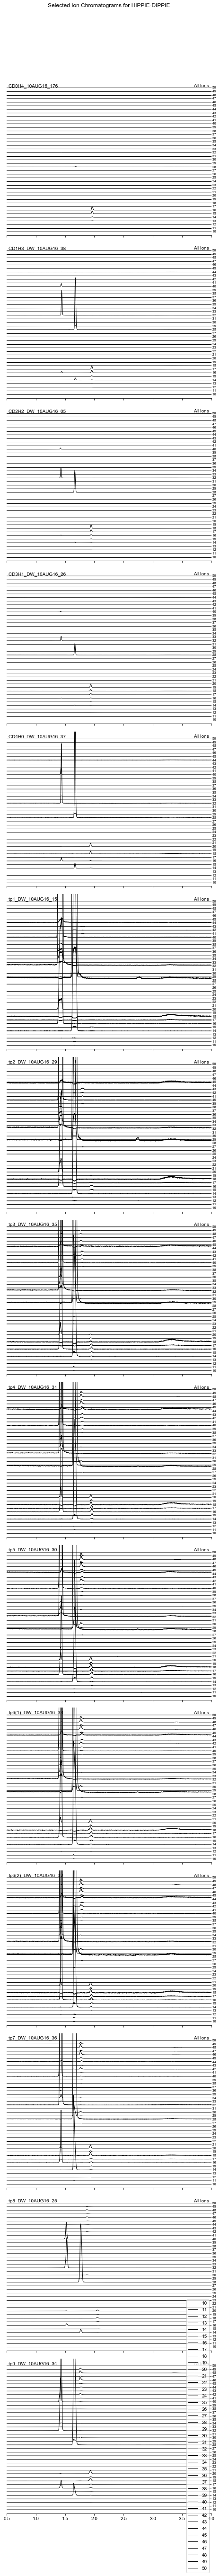

In [313]:
fig, axs = plt.subplots(len(data['files']), sharex=True, sharey=False)
fig.suptitle('Selected Ion Chromatograms for HIPPIE-DIPPIE')

# ionstoplot = [16, 17, 18, 19, 20]
ionstoplot = np.arange(10,51,1).tolist()

ymaxes = np.empty(np.shape(data['signal'])) # placeholder for max signal intensities, size = [len(data['ions']), len(data['files'])]
bkgrd = np.zeros(np.shape(data['signal'])) # placeholder for ion backgrounds
ran_once = [False] * len(data['files']) # flag for those labeling commands to execute only once per file
noffset = np.zeros(np.shape(data['signal'])) # a counter for tracking multiples of ymax'es to offset the signal by for visual clarity
ymaxperfile = np.ones([len(data['files'])])

xlims = [0.5, 4.0]

for iion in range(1, len(data['ions'])): # skip 'TIC', which is the 0th ion
    
    ## Adjust signals for background and visual offset
    for ifile in range(len(data['files'])):
        idx = np.where((data['signal'][iion][ifile][:,0] >= 2.3) & (data['signal'][iion][ifile][:,0] <= 2.8))
        bkgrd[iion,ifile] = np.average(data['signal'][iion][ifile][idx,1])
#         print(data['ions'][iion] + ' :: ' + data['files'][ifile] + ' :: ' + 'BKGRD = ' + "{:10.2f}".format(bkgrd[iion,ifile]))
    
        if data['ions'][iion].astype(np.int) in [17, 18]: # background subtraction for ions impacted by water
            data['signal'][iion][ifile][:,1] = (np.array(data['signal'][iion][ifile][:,1]) - bkgrd[iion,ifile]).tolist()

    for ifile in range(len(data['files'])):
        filter_arr = np.where((data['signal'][iion][ifile][:,0] >= 1.80) & (data['signal'][iion][ifile][:,0] <= 2.10)) # create filter to identify largest signal after 1.8 mins to use as yscale max
        try:
            y_hi = np.max(data['signal'][iion][ifile][filter_arr,1]) # retrieve maximum signal for time after 1.8 minutes
        except ValueError:
            y_hi = 1 # fix exception when data['signal'] indexed by filter_arr is an empty matrix if filter_arr = all False
        ymaxes[iion,ifile] = (np.round(y_hi) if ((y_hi != 0 and not np.isnan(y_hi))) else 1)

## Calculate max signal intensity on any ion per file
for ifile in range(len(data['files'])):
    ymaxperfile[ifile] = ymaxes[1:,ifile].max()

## Plotting
for iion in range(1, len(data['ions'])): # skip 'TIC', which is the 0th ion

    if data['ions'][iion].astype(np.int) in ionstoplot: 
        
        for ifile in range(len(data['files'])):
            
            ## Visual clarity offset
            noffset[iion,ifile] = np.array(np.where(data['ions'][iion].astype(np.int) == ionstoplot)[0][0]) # number of ymaxes to offset signal by
            offset = ymaxperfile[ifile]*noffset[iion,ifile]
#             print(data['ions'][iion] + ' :: ' + data['files'][ifile] + ' :: ' + 'YMAX  = ' + "{:10.2f}".format(ymaxes[iion,ifile]) + ' :: ' + 'OFFST = ' + "{:10.2f}".format(offset))
            
            ## Actual plotting here
            axs[ifile].plot(data['signal'][iion][ifile][:,0], data['signal'][iion][ifile][:,1] + offset, 
                            color='black',
                            linewidth=1)
            axs[ifile].text(xlims[1], offset, ' ' + data['ions'][iion],
                            fontsize='x-small',
                            horizontalalignment='left', 
                            verticalalignment = 'center')

            try:
                ia = naming['URC#'].tolist().index(data['analnames'][ifile])
                anallabel = naming.iloc[ia]['Label']
            except ValueError:
                anallabel = data['analnames'][ifile]

            if ran_once[ifile] == False:
                axs[ifile].ticklabel_format(style='plain', useOffset=False, axis='y')

                axs[ifile].text(0.01, 0.98, anallabel, 
                            horizontalalignment='left', 
                            verticalalignment = 'top',
                            transform=axs[ifile].transAxes)
                axs[ifile].text(0.99, 0.98, 'All Ions', 
                            horizontalalignment='right', 
                            verticalalignment = 'top',
                            transform=axs[ifile].transAxes)
                ran_once[ifile] = True

                plt.xlim(xlims)

for ifile in range(len(data['files'])):
    axs[ifile].set_ylim([0-ymaxperfile[ifile], ymaxperfile[ifile]*(len(ionstoplot)+1)]) # set ymax to maximum signal intensity in any Ion for each file except for TIC
#     axs[ifile].axis('off')
    axs[ifile].spines['top'].set_visible(False)
    axs[ifile].spines['right'].set_visible(False)
#     axs[ifile].spines['bottom'].set_visible(False)
    axs[ifile].spines['left'].set_visible(False)
    axs[ifile].get_yaxis().set_ticks([])
    
plt.legend([str(item) for item in ionstoplot], 
           loc='right')
    
fig.set_size_inches(6.5, 5.0*len(data['analnames'])+0.5)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
# fig.savefig('HIPPIE-DIPPIE_Stacked_Plot.pdf')
# print('Saved figure: ' + 'HIPPIE-DIPPIE_Stacked_Plot.pdf')
# print('')
fig # show figure inline in Jupyter Notebook

## SEPARATED CALC AND PLOT FUNCTIONS
Same code as above but refactored

In [414]:
## LOAD SAVED DATA
data = scipy.io.loadmat('data.mat') # loads dict called 'data' which has keys data['signal', 'ions', 'files', 'analnames']

signal = data['signal'] # size = [len(data['ions']), len(data['files'])] (here, 42 ions x 15 files)
ions = data['ions']
filelist = data['files']
analname = data['analnames']

## MAKE ZERO SIGNALS VISIBLE ON PLOT
for iion in range(len(data['ions'])):
    for ifile in range(len(data['files'])):
        if np.isnan(data['signal'][iion][ifile]).any(): # Fix nan's to plot at zero
            data['signal'][iion][ifile] = np.array([np.arange(0,10.1,0.1), np.zeros(np.shape(np.arange(0,10.1,0.1)))]).T

## LOAD ANALYSIS NAMES FROM SPREADSHEET
try:
    naming = pd.read_csv('Naming.tsv', names=['URC#', 'Label'], dtype={'URC#':str, 'Label':str}, 
                         sep='\t', encoding='ansi')
except FileNotFoundError:
    naming = pd.DataFrame({'URC#':[np.NaN, np.NaN], 'Label':['empty1', 'empty2']})

## PLOTTING PARAMETERS
ionstoplot = np.arange(10,51,1).tolist()
t_search_methane_start = 1.90 # methane peak retention time
t_search_methane_end = 2.10 

## SETUP TRACKER VARIABLES
ymaxes = np.empty(np.shape(data['signal'])) # placeholder for max signal intensities, size = [len(data['ions']), len(data['files'])]
RT_methane = np.empty(np.shape(data['files']))
bkgrd = np.zeros(np.shape(data['signal'])) # placeholder for ion backgrounds
noffset = np.zeros(np.shape(data['signal'])) # a counter for tracking multiples of ymax'es to offset the signal by for visual clarity
ymaxperfile = np.ones([len(data['files'])])
offset = np.zeros(np.shape(data['signal']))

## CLEANING AND MUNGING DATA
for iion in range(1, len(data['ions'])): # skip 'TIC', which is the 0th ion
    
    ## Adjust signals for background and visual offset
    for ifile in range(len(data['files'])):
        idx = np.where((data['signal'][iion][ifile][:,0] >= 2.3) & (data['signal'][iion][ifile][:,0] <= 2.8))
        bkgrd[iion,ifile] = np.average(data['signal'][iion][ifile][idx,1])
#         print(data['ions'][iion] + ' :: ' + data['files'][ifile] + ' :: ' + 'BKGRD = ' + "{:10.2f}".format(bkgrd[iion,ifile]))
    
        if data['ions'][iion].astype(np.int) in [17, 18, 28, 32, 44]: # background subtraction for ions impacted by water
            data['signal'][iion][ifile][:,1] = (np.array(data['signal'][iion][ifile][:,1]) - bkgrd[iion,ifile]).tolist()

    for ifile in range(len(data['files'])):
        filter_arr = np.where((data['signal'][iion][ifile][:,0] >= t_search_methane_start) & (data['signal'][iion][ifile][:,0] <= t_search_methane_end)) # create filter to identify largest methane signal to use as yscale max
        try:
            y_hi = np.max(data['signal'][iion][ifile][filter_arr,1]) # retrieve maximum signal for time after 1.8 minutes and before 2.1 minutes
        except ValueError:
            y_hi = 1 # fix exception when data['signal'] indexed by filter_arr is an empty matrix if filter_arr = all False
        ymaxes[iion,ifile] = (np.round(y_hi) if ((y_hi != 0 and not np.isnan(y_hi))) else 1)
        
## Calculate max signal intensity on any ion per file
for ifile in range(len(data['files'])):
    ymaxperfile[ifile] = ymaxes[1:,ifile].max()

## Locate x-position (time) of max signal intensity on TIC to identify methane RT
for ifile in range(len(data['files'])):
    filter_arr = np.where((data['signal'][0][ifile][:,0] >= t_search_methane_start) & (data['signal'][0][ifile][:,0] <= t_search_methane_end))
    y_hi = np.max(data['signal'][0][ifile][filter_arr,1])
    x_hi = np.where((data['signal'][0][ifile][filter_arr,1] == y_hi))
    RT_methane[ifile] = data['signal'][0][ifile][filter_arr[0][0] + x_hi[1][0],0]

## Calculate visual clarity offsets
for iion in range(1, len(data['ions'])): # skip 'TIC', which is the 0th ion

    if data['ions'][iion].astype(np.int) in ionstoplot: 
        
        for ifile in range(len(data['files'])):
            
            ## Visual clarity offset
            noffset[iion,ifile] = np.array(np.where(data['ions'][iion].astype(np.int) == ionstoplot)[0][0]) # number of ymaxes to offset signal by
            offset[iion,ifile] = ymaxperfile[ifile]*noffset[iion,ifile]
#             print(data['ions'][iion] + ' :: ' + data['files'][ifile] + ' :: ' + 'YMAX  = ' + "{:10.2f}".format(ymaxes[iion,ifile]) + ' :: ' + 'OFFST = ' + "{:10.2f}".format(offset))
     

Saved figure: HIPPIE-DIPPIE_Stacked_Plot.pdf



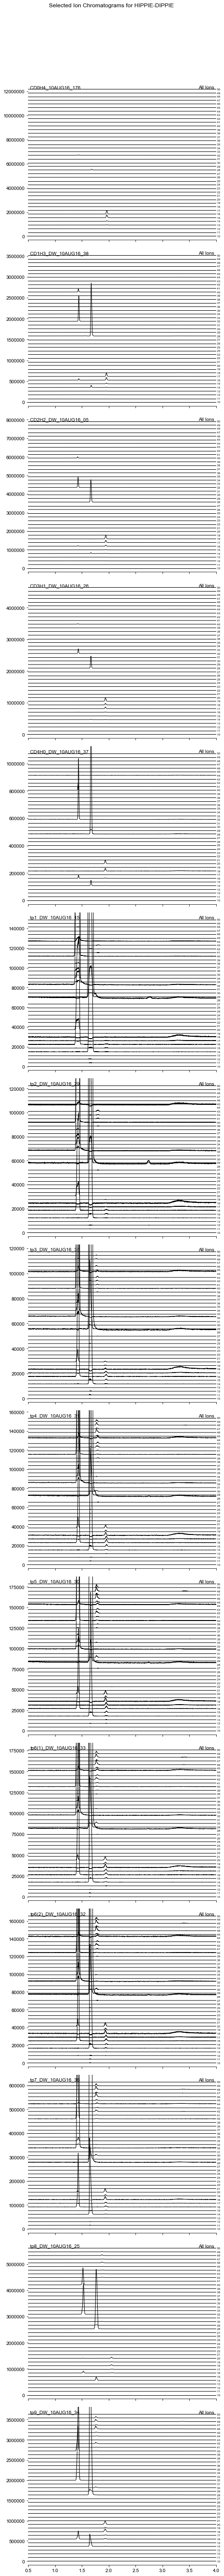

In [347]:
plt.close('all')

fig, axs = plt.subplots(len(data['files']), sharex=True, sharey=False)
fig.suptitle('Selected Ion Chromatograms for HIPPIE-DIPPIE')

xlims = [0.5, 4.0]

ran_once = [False] * len(data['files']) # flag for those labeling commands to execute only once per file

## Plotting
for iion in range(1, len(data['ions'])): # skip 'TIC', which is the 0th ion

    if data['ions'][iion].astype(np.int) in ionstoplot: 
        
        for ifile in range(len(data['files'])):
                   
            ## Actual plotting here
            axs[ifile].plot(data['signal'][iion][ifile][:,0], data['signal'][iion][ifile][:,1] + offset[iion,ifile], 
                            color='black',
                            linewidth=1)
            axs[ifile].text(xlims[1], offset[iion,ifile], ' ' + data['ions'][iion],
                            fontsize='xx-small',
                            horizontalalignment='left', 
                            verticalalignment = 'center')

            try:
                ia = naming['URC#'].tolist().index(data['analnames'][ifile])
                anallabel = naming.iloc[ia]['Label']
            except ValueError:
                anallabel = data['analnames'][ifile]

            if ran_once[ifile] == False:
                axs[ifile].ticklabel_format(style='plain', useOffset=False, axis='y')

                axs[ifile].text(0.01, 0.98, anallabel, 
                            horizontalalignment='left', 
                            verticalalignment = 'top',
                            transform=axs[ifile].transAxes)
                axs[ifile].text(0.99, 0.98, 'All Ions', 
                            horizontalalignment='right', 
                            verticalalignment = 'top',
                            transform=axs[ifile].transAxes)
                ran_once[ifile] = True

                plt.xlim(xlims)

for ifile in range(len(data['files'])):
    axs[ifile].set_ylim([0-ymaxperfile[ifile], ymaxperfile[ifile]*(len(ionstoplot)+1)]) # set ymax to maximum signal intensity in any Ion for each file except for TIC
#     axs[ifile].axis('off')
    axs[ifile].spines['top'].set_visible(False)
    axs[ifile].spines['right'].set_visible(False)
#     axs[ifile].spines['bottom'].set_visible(False)
    axs[ifile].spines['left'].set_visible(False)
#     axs[ifile].get_xaxis().set_ticks([])
#     axs[ifile].get_yaxis().set_ticks([])
    
# plt.legend([str(item) for item in ionstoplot], 
#            loc='right')
    
fig.set_size_inches(6.5, 5.0*len(data['analnames'])+0.5)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.savefig('HIPPIE-DIPPIE_Stacked_Plot.pdf')
print('Saved figure: ' + 'HIPPIE-DIPPIE_Stacked_Plot.pdf')
print('')
fig # show figure inline in Jupyter Notebook

In [326]:
type(fig)

matplotlib.figure.Figure

## Plot each figure on a separate pdf
Same code as above but in separate PDF pages

In [415]:
plt.close('all')

figD = {}
axsD = {}

xlims = [0.1, 9.9]

for ifile in range(len(data['files'])):
    figD[ifile] = plt.figure()
    axsD[ifile] = figD[ifile].add_subplot(111)    
    
    ylims = [0-ymaxperfile[ifile], ymaxperfile[ifile]*(len(ionstoplot)+1)] # set ymax to maximum signal intensity in any Ion for each file except for TIC
    
    axsD[ifile].fill_betweenx(ylims, RT_methane[ifile]-0.03, RT_methane[ifile]+0.05,
                              facecolor='lightgray') # shade methane peak position
    
    for iion in range(1, len(data['ions'])): 
        if data['ions'][iion].astype(np.int) in ionstoplot: 
            
            axsD[ifile].plot(data['signal'][iion][ifile][:,0], data['signal'][iion][ifile][:,1] + offset[iion,ifile], 
                            color='black',
                            linewidth=1)
            axsD[ifile].text(xlims[1], offset[iion,ifile], ' ' + data['ions'][iion],
                            fontsize='x-small',
                            horizontalalignment='left', 
                            verticalalignment = 'center')
            
    figD[ifile].suptitle('GC-MS SIM Mass Chromatograms for HIPPIE-DIPPIE')
    
    try:
        ia = naming['URC#'].tolist().index(data['analnames'][ifile])
        anallabel = naming.iloc[ia]['Label']
    except ValueError:
        anallabel = data['analnames'][ifile]

    axsD[ifile].ticklabel_format(style='plain', useOffset=False, axis='y')

    axsD[ifile].text(0.01, 1.01, anallabel, 
                horizontalalignment='left', 
                verticalalignment = 'bottom',
                transform=axsD[ifile].transAxes)
    axsD[ifile].text(0.99, 1.01, 'All Ions', 
                horizontalalignment='right', 
                verticalalignment = 'bottom',
                transform=axsD[ifile].transAxes)

    axsD[ifile].set_xlim(xlims)
    axsD[ifile].set_ylim(ylims) 
#     axsD[ifile].axis('off')
    axsD[ifile].spines['top'].set_visible(False)
    axsD[ifile].spines['right'].set_visible(False)
    axsD[ifile].spines['bottom'].set_visible(False)
    axsD[ifile].spines['left'].set_visible(False)
#     axsD[ifile].get_xaxis().set_ticks([])
    axsD[ifile].get_yaxis().set_ticks([])
    axsD[ifile].set_xlabel('retention time (min)')
#     axsD[ifile].set_ylabel('background-subtracted signal')


    figD[ifile].set_size_inches(8.5, 11)
#     fig.tight_layout()
#     fig.subplots_adjust(top=0.95)
    fname = './PLOT_OUTPUT_FOR_PAPER/HIPPIE-DIPPIE_Stacked_Plot_p' + str(ifile) + '.pdf'
    figD[ifile].savefig(fname)
    print('Saved plot for datafile: ' + data['files'][ifile] + ' :: to: ' + fname)

print('Done.')
print(' ')


Saved plot for datafile: .\CD0H4_10AUG16_176.csv    :: to: ./PLOT_OUTPUT_FOR_PAPER/HIPPIE-DIPPIE_Stacked_Plot_p0.pdf
Saved plot for datafile: .\CD1H3_DW_10AUG16_38.csv  :: to: ./PLOT_OUTPUT_FOR_PAPER/HIPPIE-DIPPIE_Stacked_Plot_p1.pdf
Saved plot for datafile: .\CD2H2_DW_10AUG16_05.csv  :: to: ./PLOT_OUTPUT_FOR_PAPER/HIPPIE-DIPPIE_Stacked_Plot_p2.pdf
Saved plot for datafile: .\CD3H1_DW_10AUG16_26.csv  :: to: ./PLOT_OUTPUT_FOR_PAPER/HIPPIE-DIPPIE_Stacked_Plot_p3.pdf
Saved plot for datafile: .\CD4H0_DW_10AUG16_37.csv  :: to: ./PLOT_OUTPUT_FOR_PAPER/HIPPIE-DIPPIE_Stacked_Plot_p4.pdf
Saved plot for datafile: .\tp1_DW_10AUG16_15.csv    :: to: ./PLOT_OUTPUT_FOR_PAPER/HIPPIE-DIPPIE_Stacked_Plot_p5.pdf
Saved plot for datafile: .\tp2_DW_10AUG16_29.csv    :: to: ./PLOT_OUTPUT_FOR_PAPER/HIPPIE-DIPPIE_Stacked_Plot_p6.pdf
Saved plot for datafile: .\tp3_DW_10AUG16_35.csv    :: to: ./PLOT_OUTPUT_FOR_PAPER/HIPPIE-DIPPIE_Stacked_Plot_p7.pdf
Saved plot for datafile: .\tp4_DW_10AUG16_31.csv    :: to: ./PLO

# SNIPPETS
Not part of script

In [95]:
## import IPy notebook and run whole file
import ipynb.fs.full.Plot_Up_TEGCMS # run the notebook Plot_Up_TEGCMS in its entirety

## np.in1d command for checking elementwise if in another list
if np.in1d(data['ions'][1:].astype(np.int), ionstoplot):
    pass

## element-wise round to log base 10
ymaxes[iion, ifile] = (10**(int(np.ceil(np.log10(y_hi)))) 
                       if (y_hi != 0 and not np.isnan(y_hi)) 
                       else 1) # element-wise calculation of next-highest base 10 number to each y_hi

Current directory is: I:\UTCS\Region\URC\Org_Data\HS_PG_USERS\Working\14_Users\Wang\RA\Australia _ Gippsland FIV\Current\lab data\TEGCMS_Export
Working on Signal TIC ...
Directory changed to: I:\UTCS\Region\URC\Org_Data\HS_PG_USERS\Working\14_Users\Wang\RA\Australia _ Gippsland FIV\Current\lab data\TEGCMS_Export\Export_All_Ions
Directory changed to: I:\UTCS\Region\URC\Org_Data\HS_PG_USERS\Working\14_Users\Wang\RA\Australia _ Gippsland FIV\Current\lab data\TEGCMS_Export
Saved figure: StackedEICPlot_TIC.pdf

Working on Signal 191 ...
Directory changed to: I:\UTCS\Region\URC\Org_Data\HS_PG_USERS\Working\14_Users\Wang\RA\Australia _ Gippsland FIV\Current\lab data\TEGCMS_Export\Export_All_Ions
Directory changed to: I:\UTCS\Region\URC\Org_Data\HS_PG_USERS\Working\14_Users\Wang\RA\Australia _ Gippsland FIV\Current\lab data\TEGCMS_Export
Saved figure: StackedEICPlot_191.pdf

Working on Signal 217 ...
Directory changed to: I:\UTCS\Region\URC\Org_Data\HS_PG_USERS\Working\14_Users\Wang\RA\Austral

AttributeError: module 'ipynb.fs.full' has no attribute 'Plot_Up_TEGCMS'